In [31]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [32]:
#Set the current working directory
os.chdir('D:/Practical Time Series/')

In [33]:
#Read data from Excel file
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')

In [34]:
#Display first 20 rows of the DataFrame
daily_temp.head(10)

,Date,Mean_Temperature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


In [35]:
#Make formatted date as the row index of the dataset and drop the Date column
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)

In [36]:
#Re-display the first 10 rows of the modified DataFrame
daily_temp.head(10)

,Mean_Temperature
Date,
1988-01-01,-23.00
1988-01-02,-20.50
1988-01-03,-22.00
1988-01-04,-30.50
1988-01-05,-31.00
1988-01-06,-27.50
1988-01-07,-26.25
1988-01-08,-26.50
1988-01-09,-23.00


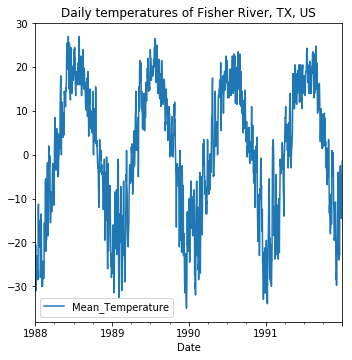

In [37]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_08.png', format='png', dpi=300)

In [38]:
#Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean_Temperature, dtype: float64

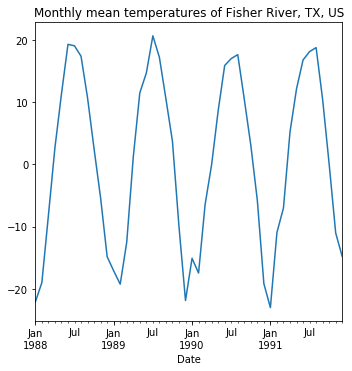

In [39]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_09.png', format='png', dpi=300)

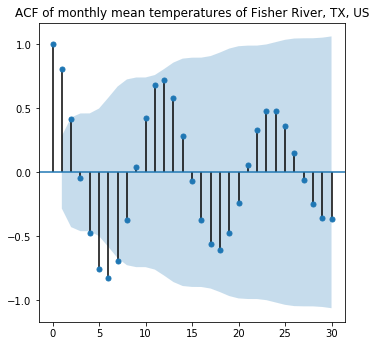

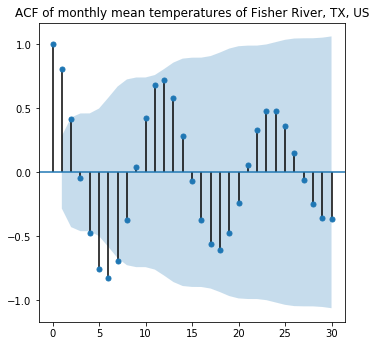

In [40]:
#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
#autocorrelation_plot(monthly_mean_temp, ax=ax)
plot_acf(monthly_mean_temp,lags=30,
         title='ACF of monthly mean temperatures of Fisher River, TX, US',
         ax=ax
        )
#plt.savefig('plots/ch2/B07887_02_10.png', format='png', dpi=300)

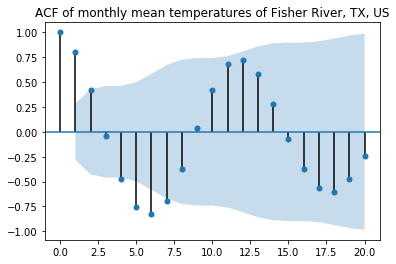

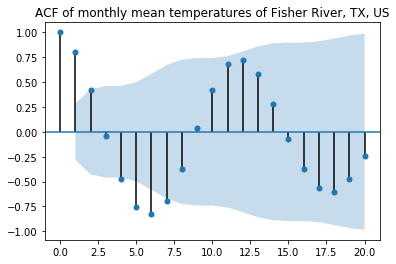

In [25]:
plot_acf(monthly_mean_temp,lags=20, title='ACF of monthly mean temperatures of Fisher River, TX, US')

(array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20]),
 array([-0.24461246, -0.47536716, -0.60369003, -0.55747598, -0.36492553,
        -0.06054339,  0.28827097,  0.58481628,  0.72311458,  0.67511451,
         0.41732813,  0.03541151, -0.37288728, -0.69382203, -0.82407157,
        -0.74793269, -0.46766027, -0.03692674,  0.42650131,  0.80754769,
         1.        ,  0.80754769,  0.42650131, -0.03692674, -0.46766027,
        -0.74793269, -0.82407157, -0.69382203, -0.37288728,  0.03541151,
         0.41732813,  0.67511451,  0.72311458,  0.58481628,  0.28827097,
        -0.06054339, -0.36492553, -0.55747598, -0.60369003, -0.47536716,
        -0.24461246]),
 <matplotlib.lines.Line2D at 0x13721305048>)

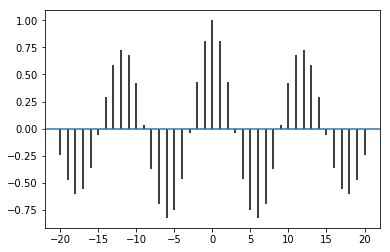

In [41]:
plt.acorr(monthly_mean_temp, maxlags=20)

In [15]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

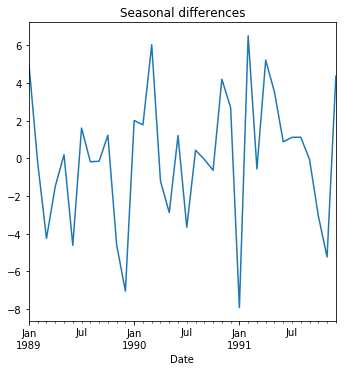

In [16]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_11.png', format='png', dpi=300)

C:\Users\avpal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


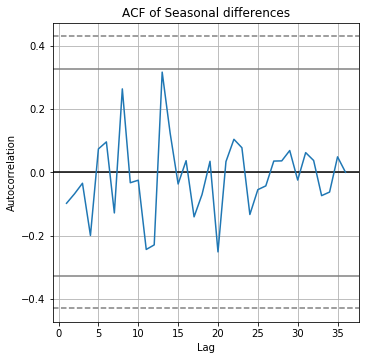

In [17]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax, )
plt.savefig('plots/ch2/B07887_02_12.png', format='png', dpi=300)

In [18]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


In [19]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


In [29]:
acf , confint, qstat , pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)

In [30]:
confint

array([[ 1.        ,  1.        ],
       [ 0.53831958,  1.10411245],
       [ 0.00433172,  0.87145271],
       [-0.51639077,  0.41884459],
       [-0.98802073, -0.05197149],
       [-1.35543488, -0.33107784],
       [-1.56063897, -0.3340289 ],
       [-1.53531912, -0.09339225],
       [-1.23703902,  0.3452841 ],
       [-0.76301287,  0.85903247],
       [-0.27877287,  1.3437273 ]])